In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define paths
dataset_dir = 'C:/Users/aryan/Downloads/archive (11)/Img_fruit'

# Define subdirectories for different qualities (now only Bad and Good)
bad_quality_dir = os.path.join(dataset_dir, 'Bad Quality_fruits')
good_quality_dir = os.path.join(dataset_dir, 'Good Quality_fruits')


In [10]:
pip uninstall opencv-python
pip install opencv-python-headless


SyntaxError: invalid syntax (262761532.py, line 1)

In [2]:
# Define image dimensions and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # 20% of data for validation
)

# Load images from the directories (Now only 2 classes: Bad and Good)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 6022 images belonging to 2 classes.
Found 1504 images belonging to 2 classes.


In [3]:
# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Now only 2 output classes (Good, Bad)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [4]:
# Train the model
EPOCHS = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)


Epoch 1/10


188/188 [==============================] - 280s 1s/step - loss: 0.1147 - accuracy: 0.9658 - val_loss: 2.6683 - val_accuracy: 0.8344
Epoch 2/10
188/188 [==============================] - 269s 1s/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 1.5747 - val_accuracy: 0.7234
Epoch 3/10
188/188 [==============================] - 274s 1s/step - loss: 0.0158 - accuracy: 0.9943 - val_loss: 3.7269 - val_accuracy: 0.7839
Epoch 4/10
188/188 [==============================] - 288s 2s/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 3.1809 - val_accuracy: 0.7972
Epoch 5/10
188/188 [==============================] - 271s 1s/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 3.0446 - val_accuracy: 0.8211
Epoch 6/10
188/188 [==============================] - 230s 1s/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 5.9035 - val_accuracy: 0.7985
Epoch 7/10
188/188 [==============================] - 222s 1s/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 2.7896 - val_accuracy: 0.79

In [8]:
# Save the trained model locally
model.save('apple_quality_model_v3_twocat.h5')


In [3]:
import tensorflow as tf  # Add this line to import TensorFlow

# Load the Keras model from .h5 file
model = tf.keras.models.load_model('apple_quality_model_v3_twocat.h5')

# Save it in SavedModel format
model.save('saved_model_format_dir')


INFO:tensorflow:Assets written to: saved_model_format_dir\assets


INFO:tensorflow:Assets written to: saved_model_format_dir\assets


In [4]:
# Load the Keras model from .h5 file
model = tf.keras.models.load_model('apple_quality_model_v3_twocat.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('apple_quality_model_v3_twocat.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\aryan\AppData\Local\Temp\tmphn_r8ml2\assets


INFO:tensorflow:Assets written to: C:\Users\aryan\AppData\Local\Temp\tmphn_r8ml2\assets


In [ ]:
import tensorflow as tf

# Load the Keras model from the .h5 file
model = tf.keras.models.load_model('path/to/your/apple_quality_model_v3_twocat.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a .tflite file on your desktop
with open('path/to/Desktop/apple_quality_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted and saved as TensorFlow Lite format.")


In [9]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('apple_quality_model_v3_twocat.h5')

# Define a function to preprocess the image from the webcam
def preprocess_image(image):
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize
    return image

# Define class labels
class_labels = ['Bad Quality', 'Good Quality', 'Mixed Quality']

# Function to detect the largest contour (assumed to be the apple)
def detect_apple(frame):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color (adjust these for apples)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # Mask for red color
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # Second mask for red (hue wraparound)
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the masks
    mask = mask1 + mask2

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(mask, (15, 15), 0)

    # Find contours in the mask
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour (which we assume is the apple)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Draw the bounding box around the apple
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop the apple region from the frame
        apple_region = frame[y:y+h, x:x+w]
        
        return apple_region, (x, y, w, h)
    
    return None, None

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Detect apple and get its bounding box and cropped region
    apple_region, bbox = detect_apple(frame)
    
    if apple_region is not None:
        # Preprocess the cropped apple region for classification
        processed_image = preprocess_image(apple_region)
        
        # Make prediction using the trained CNN model
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        
        # Get the label of the predicted class
        label = class_labels[predicted_class]
        
        # If a bounding box was detected, display the label on the frame
        if bbox is not None:
            x, y, w, h = bbox
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    # Show the frame with prediction and bounding box
    cv2.imshow('Apple Quality Classification', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [23]:
!pip install opencv-python


^C


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('apple_quality_model_v3_twocat.h5')

# Define a function to preprocess the image
IMG_WIDTH = 150
IMG_HEIGHT = 150

def preprocess_image(image):
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize
    return image

# Define class labels
class_labels = ['Bad Quality', 'Good Quality']

# Function to detect the largest contour (assumed to be the apple)
def detect_apple(frame):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color (adjust these for apples)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # Mask for red color
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # Second mask for red (hue wraparound)
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the masks
    mask = mask1 + mask2

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(mask, (15, 15), 0)

    # Find contours in the mask
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour (which we assume is the apple)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Draw the bounding box around the apple
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop the apple region from the frame
        apple_region = frame[y:y+h, x:x+w]
        
        return apple_region, (x, y, w, h)
    
    return None, None

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Detect apple and get its bounding box and cropped region
    apple_region, bbox = detect_apple(frame)
    
    if apple_region is not None:
        # Preprocess the cropped apple region for classification
        processed_image = preprocess_image(apple_region)
        
        # Make prediction using the trained CNN model
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        
        # Get the label of the predicted class
        label = class_labels[predicted_class]
        
        # If a bounding box was detected, display the label on the frame
        if bbox is not None:
            x, y, w, h = bbox
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Convert BGR (OpenCV format) to RGB (matplotlib format)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame using matplotlib
        plt.imshow(frame_rgb)
        plt.axis('off')  # Hide axes
        plt.show()

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('apple_quality_model_v2_large.h5')

# Define a function to preprocess the image
IMG_WIDTH = 150
IMG_HEIGHT = 150

def preprocess_image(image):
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize
    return image

# Define class labels
class_labels = ['Bad Quality', 'Good Quality']

# Function to detect the largest contour (assumed to be the apple)
def detect_apple(frame):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color (adjust these for apples)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # Mask for red color
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # Second mask for red (hue wraparound)
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the masks
    mask = mask1 + mask2

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(mask, (15, 15), 0)

    # Find contours in the mask
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour (which we assume is the apple)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Draw the bounding box around the apple
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop the apple region from the frame
        apple_region = frame[y:y+h, x:x+w]
        
        return apple_region, (x, y, w, h)
    
    return None, None

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Detect apple and get its bounding box and cropped region
    apple_region, bbox = detect_apple(frame)
    
    if apple_region is not None:
        # Preprocess the cropped apple region for classification
        processed_image = preprocess_image(apple_region)
        
        # Make prediction using the trained CNN model
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        
        # Get the label of the predicted class
        label = class_labels[predicted_class]
        
        # If a bounding box was detected, display the label on the frame
        if bbox is not None:
            x, y, w, h = bbox
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Show the frame in a pop-up window
    cv2.imshow('Apple Quality Classification', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('apple_quality_model_v2_large.h5')

# Define a function to preprocess the image
IMG_WIDTH = 150
IMG_HEIGHT = 150

def preprocess_image(image):
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize
    return image

# Define class labels
class_labels = ['Bad Quality', 'Good Quality']

# Function to detect the largest contour (assumed to be the apple)
def detect_apple(frame):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color (adjust these for apples)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # Mask for red color
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # Second mask for red (hue wraparound)
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the masks
    mask = mask1 + mask2

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(mask, (15, 15), 0)

    # Find contours in the mask
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour (which we assume is the apple)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Draw the bounding box around the apple
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop the apple region from the frame
        apple_region = frame[y:y+h, x:x+w]
        
        return apple_region, (x, y, w, h)
    
    return None, None

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Detect apple and get its bounding box and cropped region
    apple_region, bbox = detect_apple(frame)
    
    if apple_region is not None:
        # Preprocess the cropped apple region for classification
        processed_image = preprocess_image(apple_region)
        
        # Make prediction using the trained CNN model
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        
        # Get the label of the predicted class
        label = class_labels[predicted_class]
        
        # If a bounding box was detected, display the label on the frame
        if bbox is not None:
            x, y, w, h = bbox
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Show the frame in a pop-up window
    cv2.imshow('Apple Quality Classification', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


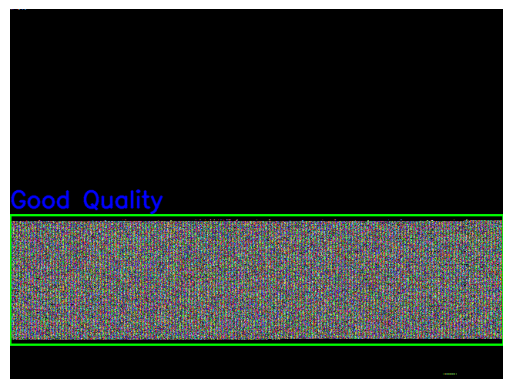

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [6]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Load the trained model
model = tf.keras.models.load_model('apple_quality_model_v2_large.h5')

# Define a function to preprocess the image
IMG_WIDTH = 150
IMG_HEIGHT = 150

def preprocess_image(image):
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize
    return image

# Define class labels
class_labels = ['Bad Quality', 'Good Quality']

# Function to detect the largest contour (assumed to be the apple)
def detect_apple(frame):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color (adjust these for apples)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # Mask for red color
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # Second mask for red (hue wraparound)
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the masks
    mask = mask1 + mask2

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(mask, (15, 15), 0)

    # Find contours in the mask
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour (which we assume is the apple)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box coordinates of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Draw the bounding box around the apple
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop the apple region from the frame
        apple_region = frame[y:y+h, x:x+w]
        
        return apple_region, (x, y, w, h)
    
    return None, None

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Detect apple and get its bounding box and cropped region
    apple_region, bbox = detect_apple(frame)
    
    if apple_region is not None:
        # Preprocess the cropped apple region for classification
        processed_image = preprocess_image(apple_region)
        
        # Make prediction using the trained CNN model
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        
        # Get the label of the predicted class
        label = class_labels[predicted_class]
        
        # If a bounding box was detected, display the label on the frame
        if bbox is not None:
            x, y, w, h = bbox
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Convert BGR (OpenCV format) to RGB (matplotlib format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axes
    clear_output(wait=True)  # Clear previous output for real-time update
    plt.show()

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()


In [1]:
import tensorflow as tf

# Load your TensorFlow model
model = tf.keras.models.load_model('apple_quality_model_v3_twocat.h5')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)





INFO:tensorflow:Assets written to: C:\Users\aryan\AppData\Local\Temp\tmp2ou2x0dn\assets


INFO:tensorflow:Assets written to: C:\Users\aryan\AppData\Local\Temp\tmp2ou2x0dn\assets


In [2]:
import tensorflow as tf

# Load the TensorFlow model (adjust the path to your model)
model = tf.keras.models.load_model('apple_quality_model_v3_twocat.h5')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Specify the path to your Windows desktop
desktop_path = r'Desktop\model.tflite'

# Save the converted model to your desktop
with open(desktop_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model saved to {desktop_path}")


INFO:tensorflow:Assets written to: C:\Users\aryan\AppData\Local\Temp\tmp95b_o3je\assets


INFO:tensorflow:Assets written to: C:\Users\aryan\AppData\Local\Temp\tmp95b_o3je\assets


Model saved to Desktop\model.tflite
